# IOC Techup 11b - Activities Supporting: Advanced Data Science

Author: Dr. Robert Lyon

Contact: robert.lyon@edgehill.ac.uk (www.scienceguyrob.com)

Institution: Edge Hill University

Version: 1.0
    
## Code & License
The code and the contents of this notebook are released under the GNU GENERAL PUBLIC LICENSE, Version 3, 29 June 2007. The videos are exempt from this, please check the license provided by the video content owners if you would like to use them.

## Introduction

This notebook has been written to support the IOC Techup-Women Module, 11b Advanced Data Science. 

<br/>

This resource is supposed to be used in conjunction with the slides made available for the module.

<br/>

## What is Google Colab?
Google Colab provides a software environment you can use to execute code. This means you don't have to setup any complicated software environments for yourself - you can simply load this site and run our activities. You'll need your own Google ID to login and use this resource to its full potential. So please, sign up for a Google account if you **do not** already have one. 

<br/>

Some of the cells below may contain videos that you should watch, if unfamiliar with the topics covered. If a video cell seems empty (you can't see a video), hover your mouse over the cell. A play button should appear. Click that play button, and then the video should fill the cell. The eagle eyes amongst you might realise that inside these cells I'm using Python to embed some HTML code. This loads the video directly from YouTube. But you don't need to worry about those details.

<br/>

## Using This Resource
1. Login to the Colab using a Google account or create one.
2. Next we need to create **your** own copy of this resource. That way you can edit it any way you please. To do this, head up to the **"File"** menu at the top of the screen. Click the **"File"** menu.
3. Next, click the option that says **"Download .ipynb"**. This will download the resource to your own personal computer.
4. Now rename the downloaded file so that you know what it is - for example, *"my activities.ipynb"*. Remember to keep the file extension **".ipynb"** in the file name.
5. Now we upload the renamed file to the Colab environment. To do this, click the **"File"** menu, then **"Upload Notebook"**.
Use the file chooser that appears, to select the file you renamed.
6. The notebook should load into your browser window. This is now **your** notebook. Any changes you make to it, will not affect anybody else. Please feel free to modify it as you wish.
7. The notebook is made up of cells. To run the code inside the cells, we must **"execute"** these cells. This is easy to do. Simply hover your mouse over the left most end of a cell containing code. A small **"play"** button will appear. Click this play button to execute the code. 

<br/>

I advise that you step through each cell in this notebook slowly, at your own pace. Once you understand each cell, move on. This is important as each cell builds upon the next. 

<br/>

Remember, each cell is supposed to be executed in turn from the top to the bottom of this notebook. So, keep that in mind!

<br/>

---

## 1. Law of Large Numbers

For once, Wikipedia has a very concise and useful description of the law of large numbers. I include this description below to get us started:

<br/>

"*In probability theory, the law of large numbers is a theorem that describes the result of performing the same experiment a large number of times. According to the law, the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer to the expected value as more trials are performed.*"

<br/>

**Credit:** Wikipedia contributors. (2019, December 4). [Law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers). In Wikipedia, The Free Encyclopaedia. Retrieved 12:54, December 9, 2019.

<br/>

The law is very useful, as it allows us to guarantee stable estimations in the long term for random events and processes. In the lecture notes, we used an example of a die role. Let's recreate that experiment here in Python code. When ready, ready through the code in the cell below. It rolls a simulated die and calculates the fraction of sixes rolled for $n$ rolls. The code below accepts your input - so be sure to choose the number of rolls to simulate. Start by rolling just a few times and observe the probability of rolling a six. Then increase the number of rolls - what happens?

<br/>

First, I define a dice roll function. Execute the code when ready.

<br/>


In [0]:
import numpy as np

def die_roll():
  """
  Simple function that simulates a die role.
  Uses the in-built python random function to 
  simulate random behaviour.

  Input:
        None.

  Output:
        A random integer number between 1 and 6 inclusive.
  """
  rand = np.random.randint(low=1,high=7) # Use a numpy function for this.

  return rand


<br/>

Next, we use the die roll function. Execute the code when ready.

<br/>

In [0]:

# A list that will count the rolls of each number
rolled = [0, 0, 0, 0, 0, 0]

# Number of trials to run
trials = 0;

# Get this value from the user.
trials = int(input('How many trials would you like? '))

# Now run the trials using a for loop.
for i in range(0,trials):

  # Roll the simulated die.
  roll_value = die_roll()

  # We have a list which counts the die roll outcomes.
  # We increment values in the list that correspond to
  # the outcome. For example, if this is our list:
  #
  #   index = 0  1  2  3  4  5
  #           |  |  |  |  |  |
  #           v  v  v  v  v  v
  # rolled = [3, 5, 2, 6, 2, 0,]
  #
  # Then the number of sixes rolled so far is 5. We can
  # increment the number of sixes rolled via,
  #
  # rolled[5] +=1
  #
  # This is all we are doing below.
  rolled[roll_value-1] += 1

print("What are the roll outcomes: ", rolled)

fraction_of_sixes = rolled[5]/trials # We use the index 5, due to zero indexing.

print("Fraction of sixes as decimal: ", fraction_of_sixes)
prob_of_6 = fraction_of_sixes * 100.0 # Compute percentage.

print("Observed probability of 6 occurring: ", prob_of_6, "%.")
print("Exact probability of 6 occurring: 16.66666...% or approx. 16.67%.")


How many trials would you like? 1000
What are the roll outcomes:  [182, 172, 154, 161, 168, 163]
Fraction of sixes as decimal:  0.163
Observed probability of 6 occurring:  16.3 %.
Exact probability of 6 occurring: 16.66666...% or approx. 16.67%.


<br/>

We can modify this example, so that we compute the probability of rolling a six after each die roll. This requires mostly the same code as before, but with just some minor changes. Below I set the number of trials to 100, but you can experiment with this value for yourself. You should find that as you increase the number of trials, the proportion of sixes slowly approaches 16.67%. Execute the code when ready. 

<br/>

In [0]:
# A list that will count the rolls of each number
rolled = [0, 0, 0, 0, 0, 0]
prob_6 = []
# Number of trials to run
trials = 100;

# Now run the trials using a for loop.
for i in range(0,trials):

  # Roll the simulated die.
  roll_value = die_roll()

  # We have a list which counts the die roll outcomes.
  # We increment values in the list that correspond to
  # the outcome. For example, if this is our list:
  #
  #   index = 0  1  2  3  4  5
  #           |  |  |  |  |  |
  #           v  v  v  v  v  v
  # rolled = [3, 5, 2, 6, 2, 0,]
  #
  # Then the number of sixes rolled so far is 5. We can
  # increment the number of sixes rolled via,
  #
  # rolled[5] +=1
  #
  # This is all we are doing below.
  rolled[roll_value-1] += 1

  # Calculate the probability of rolling a six
  fraction_of_sixes = rolled[5] / trials

  # Store this in a variable.
  prob_6.append(fraction_of_sixes)

print("What are the roll outcomes: ", rolled)

fraction_of_sixes = rolled[5]/trials # We use the index 5, due to zero indexing.

print("Fraction of sixes as decimal: ", fraction_of_sixes)
prob_of_6 = fraction_of_sixes * 100.0 # Compute percentage.

print("Observed probability of 6 occurring: ", prob_of_6, "%.")
print("Exact probability of 6 occurring: 16.66666...% or approx. 16.67%.")


What are the roll outcomes:  [16, 21, 15, 11, 14, 23]
Fraction of sixes as decimal:  0.23
Observed probability of 6 occurring:  23.0 %.
Exact probability of 6 occurring: 16.66666...% or approx. 16.67%.


<br/>

Now we plot the data obtained above. Run the cell below, each time you run the cell above to see how the plot is updated. Execute the code when ready.

<br/>

Populating the interactive namespace from numpy and matplotlib


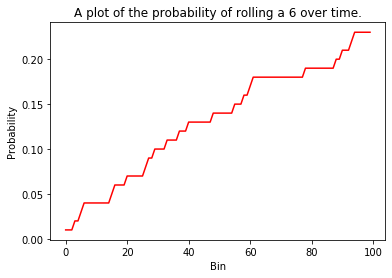

In [0]:
%pylab inline 
import matplotlib.pyplot as plt

# Here I plot the contents of the variable holding
# the probability of landing a six.

figure(1)
plot(prob_6, 'r') # The 'r' parameter tells matplotlib to plot in red.
xlabel('Bin')
ylabel('Probability')
title("A plot of the probability of rolling a 6 over time.")
show()


<br/>

As we can see in the plot, the probability approaches 16.67% over time.

<br/>

### Activity 1.1

<br/>

In the lecture notes (part 4, slide 26), we discussed rolling two die at the same time, and summing the result. The table below gives the probability of achieving each potential sum. The most common outcome is a sum of 7, with a probability of $\frac{6}{36}$

<br/>

|Sum | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
|----|---|---|---|---|---|---|---|---|----|----| ---|
|Prob. | $\frac{1}{36}$ | $\frac{2}{36}$ | $\frac{3}{36}$ | $\frac{4}{36}$ | $\frac{5}{36}$ | $\frac{6}{36}$ | $\frac{5}{36}$ | $\frac{4}{36}$ | $\frac{3}{36}$ | $\frac{2}{36}$ | $\frac{1}{36}$ |

<br/>

Can you show experimentally that this is indeed the case? The aim of this activity is to produce some code that shows that for $n$ trials, the probability of landing a 7 is approximately $\frac{6}{36}$. I suggest doing two things:

<br/>

1. Write a function for the double die roll.
2. Write some code that runs the experiment for $n$ trials.

<br/>

Feel free to modify the code provided above to solve this problem. When done print the output. If you get stuck, an answer is provided below - but only look at the answer if you really need to!

<br/>


In [0]:
# Please write your code here...
import random

def sum_double_die_roll():
  """
  Simple function that simulates the roll of two dice,
  and adds up the result. Uses the in-built python random
  function to simulate random behaviour.

  Input:
        None.

  Output:
        A value in the range 2 and 12 inclusive.
  """

  return None # Fix me.

# The code that runs your experiment goes here.
# ...

### Activity 1.1 Solution

In [0]:
import numpy as np

def sum_double_die_roll():
  """
  Simple function that simulates the roll of two dice,
  and adds up the result. Uses the in-built python random
  function to simulate random behaviour.

  Input:
        None.

  Output:
        A value in the range 2 and 12 inclusive.
  """
  # Use a numpy function for this.
  die_1 = np.random.randint(low=1,high=7) 
  die_2 = np.random.randint(low=1,high=7) 
  return die_1 + die_2

# The code that runs the experiment goes here.


# A list that will count the rolls of each number
rolled = [0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0,]

# Number of trials to run
trials = 100;

# Now run the trials using a for loop.
for i in range(0,trials):

  # Roll the simulated die.
  roll_value = sum_double_die_roll()

  # Do you understand why I use an index - 2 here?
  #
  #   index = 0  1  2  3  4  5              10
  #           |  |  |  |  |  |              |
  #           v  v  v  v  v  v        ....  v
  # rolled = [3, 5, 2, 6, 2, 0, 3, 5, 2, 6, 0,]
  #
  # So rolled[10] gives us the number of twelves rolled.
  rolled[roll_value-2] += 1

print("What are the roll outcomes: ", rolled)

fraction_of_sevens = rolled[5]/trials # We use the index 5, due to zero indexing.

print("Fraction of sevens as decimal: ", fraction_of_sevens)
prob_of_7 = fraction_of_sevens * 100.0 # Compute percentage.

print("Observed probability of 7 occurring: ", prob_of_7, "%.")
print("Exact probability of 7 occurring: 16.66666...% or approx. 16.67%.")

rolled = None # I set this variable to none, to cleanup explicitly.


What are the roll outcomes:  [1, 5, 11, 8, 12, 16, 15, 13, 8, 7, 4]
Fraction of sevens as decimal:  0.16
Observed probability of 7 occurring:  16.0 %.
Exact probability of 7 occurring: 16.66666...% or approx. 16.67%.



<br/>

That's it for Section 1.


<br/>

---


## 2. Data Visualisation

<br/>

As data scientists, we often need to present our data to others, to explain our results. There are a few standard methods for data visualisation that you should be familiar with. Before we start visualising data, we going to need to create some to work with. We can do this using the in-built features of libraries such as *numpy*. In the cell below, we create some normally distributed data with a mean of 0, and a standard deviation of 1. This is the standard normal distribution. Execute the code when ready.

<br/>

In [0]:

np.random.seed(1) # Initiate a random number generator.

mu    = 0.0 # The mean of the data.
sigma = 1.0 # The standard deviation of the data.
n     = 100 # The number of random samples to take.

# Create the data
data_1 = np.random.normal(size = n, loc = mu, scale = sigma)

print("Data samples created: ", len(data_1))

Data samples created:  100


<br/>

The code above may appear confusing. What is it really doing? Well, what we are doing is using *numpy* to create an ideal normal distribution, mean a mean of 0 and a standard deviation of 1. We then use a random number to generate $n$ samples from this distribution.  Since the data is normally distributed, we know that random samples from this distribution will occur with some probability. The mean, at the centre of the distribution, is the most likely value to occur. Let’s see what happens if we plot this data – will this description make sense? Execute the code when ready.

<br/>

Populating the interactive namespace from numpy and matplotlib


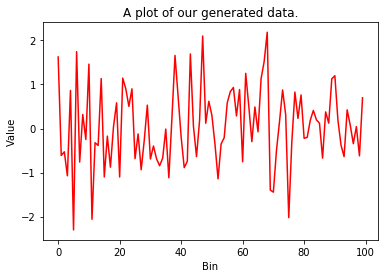

In [0]:
%pylab inline 
import matplotlib.pyplot as plt

# Here I plot the contents of the vgenerated data.
figure(2)
plot(data_1, 'r') # The 'r' parameter tells matplotlib to plot in red.
xlabel('Bin')
ylabel('Value')
title("A plot of our generated data.")
show()

<br/>

When we plot this data, it doesn't look like much. It all looks pretty random, just fluctuating between the values minus two, and two. This type of line plot isn't the best way of visualising this data - instead we'll try to create a histogram, to see what patterns there are in the data. Execute the code when ready.

<br/>


Populating the interactive namespace from numpy and matplotlib


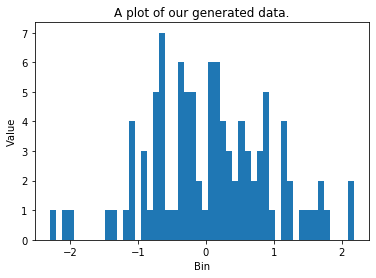

In [0]:
%pylab inline 
import matplotlib.pyplot as plt

# Here I plot a histogram of the data.
figure(3)
hist(data_1, bins=50) # The 'bins' parameter determine how many bars will be used.
xlabel('Bin')
ylabel('Value')
title("A plot of our generated data.")
show()

<br/>

We can see that our data is starting to look like a bell-shaped curve. It doesn’t look perfect, as we’ve only sampled $n=100$ times from the distribution. If we take more samples, due to the law of large numbers, we’ll start to see what the real probability distribution looks like. Let’s try that now. Let’s create many more samples, then create a histogram of the data. Execute the code when ready.

<br/>


Populating the interactive namespace from numpy and matplotlib
Data samples created:  10000


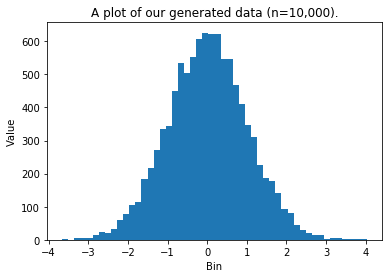

In [0]:
%pylab inline 
import matplotlib.pyplot as plt

np.random.seed(1) # Initiate a random number generator.

mu    = 0.0 # The mean of the data.
sigma = 1.0 # The standard deviation of the data.
n     = 10000 # The number of random samples to take.

# Create the data
data_1 = np.random.normal(size = n, loc = mu, scale = sigma)

print("Data samples created: ", len(data_1))

# Here I plot a histogram of the data.
figure(4)
hist(data_1, bins=50)# The 'bins' parameter determines how many bars will be used.
xlabel('Bin')
ylabel('Value')
title("A plot of our generated data (n=10,000).")
show()

<br/>

The data is now starting to look very much like a normal distribution. Let’s compute the mean and standard deviation of the data to ensure the data generation procedure worked as expected. Remember, we don’t have all the data that perfectly describes the true distribution here. That is, we don’t have the population. Instead, we have a data sample – so we’ll compute the sample mean, and the sample standard deviation. Execute the code when ready.

<br/>


In [0]:
sample_mean = np.mean(data_1)

# In the code below, the 'ddof' parameter tells numpy to compute the sample
# standard deviation. If you need the population standard deviation, simply 
# use np.std(data) without the 'ddof' parameter.
sample_stdev = np.std(data_1, ddof=1)

print("Sample mean: ", sample_mean)
print("Sample standard deviation: ", sample_stdev)


Sample mean:  0.00977265669910497
Sample standard deviation:  0.9988357867259919


<br/>

We should find that the sample mean we compute in the cell above, is very close to 0, and the sample standard deviation very close to 1. This confirms that the data we generated is from the distribution we specified. To confirm this, we can fit a normal curve to the data. We do this in the cell below. Execute the code when ready.

<br/>


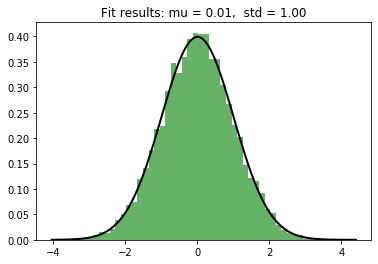

In [0]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Fit a normal distribution to the data we created earlier.
mu, std = norm.fit(data_1)

# Plot the histogram. Details of this function can be found here:
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html
# Here the alpha parameter dictates how transparent the histogram will be,
# so alpha=1.0 is zero transparency, and alpha=0.0 is completely 
# transparent.
plt.hist(data_1, bins=50, density=True, alpha=0.6, color='g')

# Now we plot what we call the probability density function, or PDF.
xmin, xmax = plt.xlim() # Gets the max and min values in the data.

# Creates equally spaced numerical values between the mix and max values. This 
# call produces an array of values. These will be used to create x-axis co-
# ordinates, which we need to plot the normal curve. Remember to plot the curve,
# we need x and y-axis values.
x = np.linspace(xmin, xmax, 100) 

# This line creates the probability density function - this provides the y 
# values for the plot.
y = norm.pdf(x, mu, std)

# Now we plot the function over the top of the histogram.
plt.plot(x, y, 'k', linewidth=2)
title = ("Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.title(title)

# Finally show the plot.
plt.show()


<br/>

Now we can see that the data does closely match the normal curve. Another way to represent this data, is to use a box and whisker plot. When ready, watch the video in the cell below, as it will explain box and whisker plots in more detail.

<br/>



In [0]:
from IPython.display import IFrame
# Then the code below actually shows the video. Don't worry about understanding
# this code. I just include this explanation for the curious.
IFrame(src='https://www.youtube.com/embed/mhaGAaL6Abw', width=560, height=315)

<br/>

Box and whisker plots are incredibly useful tools for quickly summarising data – make use of them when and where you can! In the cell below, I show how to generate box and whisker plots for the normal data we already generated. When ready, execute the cell below.

<br/>

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['title', 'std', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


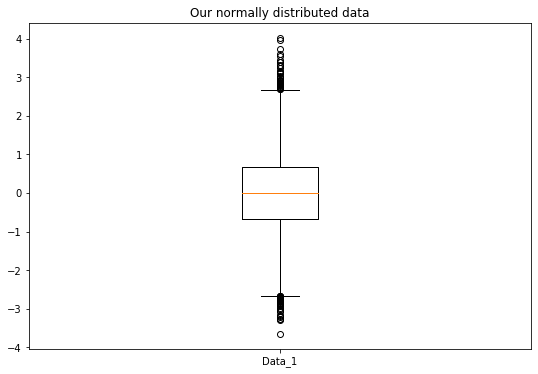

In [0]:
%pylab inline 
import matplotlib.pyplot as plt

# Create a figure instance
fig = plt.figure(6, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)
## Custom x-axis labels
ax.set_xticklabels(['Data_1'])
ax.set_title("Our normally distributed data")

# Create the boxplot
bp = ax.boxplot(data_1)

<br/>

Suppose we have more than one data source, and we want to compare them using a box and whisker plot. We can do this in python fairly simply. In the cell below, I generate some new normally distributed data. I then create a plot containing two box plots, allow the two datasets we’ve created to be compared. When ready, execute the cell below.

<br/>



Populating the interactive namespace from numpy and matplotlib


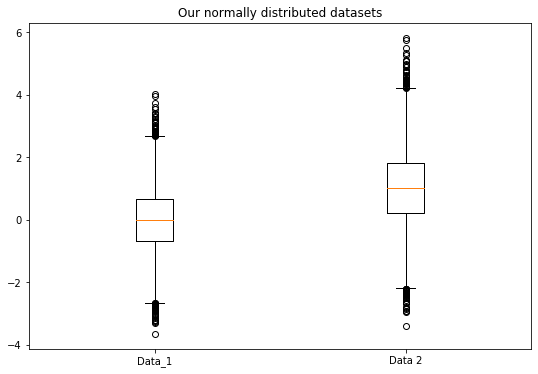

In [0]:
%pylab inline 
import matplotlib.pyplot as plt

#********************
# Create new data...
#********************

np.random.seed(1) # Initiate a random number generator.

mu    = 1.0 # The mean of the data.
sigma = 1.2 # The standard deviation of the data.
n     = 10000 # The number of random samples to take.

# Create the data
data_2 = np.random.normal(size = n, loc = mu, scale = sigma)

#********************
# Plot the data...
#********************

data_to_plot = [data_1, data_2]

# Create a figure instance
fig = plt.figure(7, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

ax.set_xticklabels(['Data_1', 'Data 2'])
ax.set_title("Our normally distributed datasets")

# Create the boxplot
bp = ax.boxplot(data_to_plot)

<br/>

To bring our understanding full circle, let’s plot the probability density functions for both these datasets, together. The cell below contains the code that does this. When ready, execute the code.

<br/>




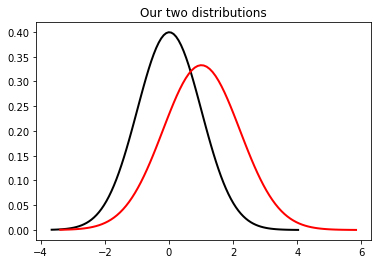

In [0]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

#********************
# Plot one (data_1)
#********************

# Let's recreate the PDF for our first dataset.
mu, std = norm.fit(data_1)

# Now we plot what we call the probability density function, or PDF.
xmin = min(data_1)
xmax = max(data_1)
x = np.linspace(xmin, xmax, 100) 
y = norm.pdf(x, mu, std)

# Now we plot the function 
plt.plot(x, y, 'k', linewidth=2)

#********************
# Plot two (data_2)
#********************

# Let's recreate the PDF for our first dataset.
mu, std = norm.fit(data_2)

# Now we plot what we call the probability density function, or PDF.
xmin = min(data_2)
xmax = max(data_2)
x = np.linspace(xmin, xmax, 100) 
y = norm.pdf(x, mu, std)

# Now we plot the function 
plt.plot(x, y, 'r', linewidth=2)


# Now add a plot title...
title = ("Our two distributions")
plt.title(title)

# Finally show the plot.
plt.show()

# And clear the data
data_1 = None # I set this variable to none, to cleanup explicitly.
data_2 = None # I set this variable to none, to cleanup explicitly.

<br/>

Before moving on, watch the video in the cell below. It will help to explain what a probability density function is – a term I’ve not yet explained.

<br/>


In [0]:
from IPython.display import IFrame
# Then the code below actually shows the video. Don't worry about understanding
# this code. I just include this explanation for the curious.
IFrame(src='https://www.youtube.com/embed/Fvi9A_tEmXQ', width=560, height=315)

### Activity 2.1

<br/>

The aim of the following activity is to create some uniformly distributed data, calculate the sample mean of the data, and to plot the histogram and probability density function for this distribution. Before you start, please watch the video below, which will explain the uniform distribution in detail.

<br/>



In [0]:
from IPython.display import IFrame
# Then the code below actually shows the video. Don't worry about understanding
# this code. I just include this explanation for the curious.
IFrame(src='https://www.youtube.com/embed/3C9mpj-NYgo', width=560, height=315)

<br/>

Now remember, there are three aims here:

1.  Create some uniformly distributed data. Create data over the range 1 to 6.
2.  Calculate the sample mean.
3.  Plot the histogram for this distribution.

<br/>

Hint: [Here](https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.uniform.html#numpy.random.uniform) is a link to the function you can use to create uniformly distribute data.

<br/>

If you get stuck, don’t worry. An answer is provided below.

<br/>


In [0]:
%pylab inline 
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Your code here.

#********************
# Create the data
#********************

# Create the data
n = 1000
data = ?

#********************
# Calculate the mean
#********************

data_mean = ?

print("The mean of the uniformly distributed data is: ", data_mean)

#********************
# Histogram
#********************

b = 100 # The number of bins.

# And clear the data
data = None # I set this variable to none, to cleanup explicitly.


### Activity 2.1 Solution

Populating the interactive namespace from numpy and matplotlib
The mean of the uniformly distributed data is:  3.5030229972795257


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['title', 'std', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


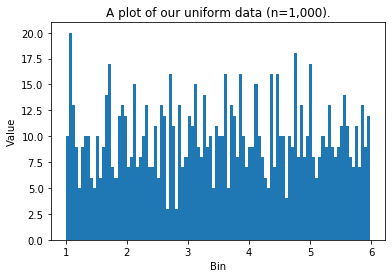

In [0]:
%pylab inline 
import matplotlib.pyplot as plt
from scipy.stats import uniform

#********************
# Create the data
#********************

np.random.seed(1) # Initiate a random number generator.

l = 1.0 # The lower limit of the uniform data.
h = 6   # The upper limit of the uniform data.
n = 1000 # The number of random samples to take.

# Create the data
data = np.random.uniform(low=l, high=h, size = n)

#********************
# Calculate the mean
#********************

data_mean = np.mean(data)
print("The mean of the uniformly distributed data is: ", data_mean)

#********************
# Histogram
#********************

b = 100 # The number of bins.

# Here I plot a histogram of the data.
figure(9)
hist(data, bins=b)# The 'bins' parameter determines how many bars will be used.
xlabel('Bin')
ylabel('Value')
title("A plot of our uniform data (n=1,000).")

# And clear the data
data = None # I set this variable to none, to cleanup explicitly.


<br/>

That's it for Section 2.


<br/>

---


## 3. Data Pre-processng & Summary Statistics

<br/>

Summary statistics are very important for understanding our data. Before we compute them, we often pre-process our data first. This involves modifying the data in specific ways to help make it easier to work with. We tackle one example of data pre-processing next called scaling. This is a process used to scale the data to a new data range.

<br/>

### Activity 3.1

<br/>

There is a formula you can use to scale data to such a range. This formula is provided below:

<br/>

$x^{\prime} = (min_{new} \times (1 - ( (x - min) /( max - min )))) + (max_{new} \times ( (x - min) /( max - min ) ))$

<br/>

This formula might seem intimidating at first. So, let's provide an example, and break it down. Suppose we have the data,

<br/>

$Y=[1, 2, 3]$

<br/>

The minimum value of this data is 1. The maximum value is 3. We want to scale this data to the range zero to one - that is, all values should fall inside that range. We have our desired new minimum equalto 0, and our desired new maximum equal to 1.

<br/>

$min = 1$

$max=3$

$min_{new}=0$

$min_{new}=1$

<br/>

So let's rescale our first value in $x$, which is 1. We have the formula,

<br/>

$x^{\prime} = (min_{new} \times (1 - ( (x - min) /( max - min )))) + (max_{new} \times ( (x - min) /( max - min ) ))$

<br/>

And we can now fill this in:

$x^{\prime} = (0 \times (1 - ( (x - 1) /( 3 - 1 )))) + (1 \times ( (x - 1) /( 3 - 1 ) ))$

<br/>

Now we can input a value for $x$, which in this case is 1.

$x^{\prime} = (0 \times (1 - ( (1 - 1) /( 3 - 1 )))) + (1 \times ( (1 - 1) /( 3 - 1 ) ))$

Now we can work it out.

<br/>

$x^{\prime} = (0 \times (1 - ( 0 / 2 ))) + (1 \times ( 0 / 2 ))$

$ = (0 \times (1 - 0)) + (1 \times 0)$

$ = (0 \times 1) + 0$

$ = 0 + 0$

$ = 0$

<br/>

We have successfully rescaled the first value. Can you do the same for $x=3$?

<br/>

$x^{\prime} = (min_{new} \times (1 - ( (3 - min) /( max - min )))) + (max_{new} \times ( (3 - min) /( max - min ) ))$

<br/>

Now we can work it out.

<br/>

$ = (0 \times (1 - ( (3 - min) /( max - min )))) + (1 \times ( (3 - min) /( max - min ) ))$

$ = (0 \times (1 - ( (3 - 1) /( 3 - 1 )))) + (1 \times ( (3 - 1) /( 3 - 1 ) ))$

$ = (0 \times (1 - ( (3 - 1) /( 3 - 1 )))) + (1 \times ( (3 - 1) /( 3 - 1 ) ))$

$ = (0 \times (1 - ( 2 / 2 ))) + (1 \times ( 2 / 2 ))$

$ = (0 \times (1 - 1)) + (1 \times 1)$

$ = (0 \times 0) + (1 \times 1)$

$ = 0 + 1$

$ = 1$

<br/>

In the cell below, I'd like you to write a function capable of scaling data, ideally to the range zero to one. Write this code as a function called ```my_scale``` , so that it can scale an entire list. Before we do that, we create some data to test with.

<br/>


In [0]:
np.random.seed(1) # Initiate a random number generator.

mu    = 10.0 # The mean of the data.
sigma = 7.64 # The standard deviation of the data.
n     = 1000 # The number of random samples to take.

# Create the data
data = np.random.normal(size = n, loc = mu, scale = sigma)

print("Data samples created: ", len(data))

Data samples created:  1000


<br/>

We plot this data to see what it looks like.

<br/>


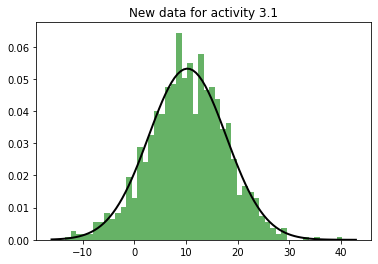

In [0]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Fit a normal distribution to the data we created earlier.
mu, std = norm.fit(data)

# Plot the histogram. Details of this function can be found here:
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html
# Here the alpha parameter dictates how transparent the histogram will be,
# so alpha=1.0 is zero transparency, and alpha=0.0 is completely 
# transparent.
plt.hist(data, bins=50, density=True, alpha=0.6, color='g')

# Now we plot what we call the probability density function, or PDF.
xmin, xmax = plt.xlim() # Gets the max and min values in the data.

# Creates equally spaced numerical values between the mix and max values. This 
# call produces an array of values. These will be used to create x-axis co-
# ordinates, which we need to plot the normal curve. Remember to plot the curve,
# we need x and y-axis values.
x = np.linspace(xmin, xmax, 100) 

# This line creates the probability density function - this provides the y 
# values for the plot.
y = norm.pdf(x, mu, std)

# Now we plot the function over the top of the histogram.
plt.plot(x, y, 'k', linewidth=2)
title = ("New data for activity 3.1")
plt.title(title)

# Finally show the plot.
plt.show()


<br/>

We can see that this data has a mean of around 10. In the cell below, try to write your data scaling function. If you get stuck, look at the answer below.

<br/>

In [0]:
# For some math we need to do.
import numpy as np

########################### 
# Write your code here.
########################### 

def my_scale(data, new_min, new_max):
    """
    Scales data to within the range [new_min,new_max].

    Parameters
    ----------
    :param data: the data to scale.
    :param new_min: the new minimum value for the data range.
    :param new_max: the new maximum value for the data range.

    Returns
    ----------
    :return: A new array with the data scaled to within the range [new_min,new_max].
    """
    # Add code....

    return []
    
########################### 
# End your code here.
########################### 

# This csection runs your code.
new_min = 0
new_max = 1

scaled_data =  my_scale(data,new_min,new_max)

########################### 
# Now plot the data to test
########################### 

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Fit a normal distribution to the data we created earlier.
mu, std = norm.fit(data)

# Plot the histogram. Details of this function can be found here:
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html
# Here the alpha parameter dictates how transparent the histogram will be,
# so alpha=1.0 is zero transparency, and alpha=0.0 is completely 
# transparent.
plt.hist(scaled_data, bins=50, density=True, alpha=0.6, color='g')

# Now we plot what we call the probability density function, or PDF.
xmin, xmax = plt.xlim() # Gets the max and min values in the data.

# Creates equally spaced numerical values between the mix and max values. This 
# call produces an array of values. These will be used to create x-axis co-
# ordinates, which we need to plot the normal curve. Remember to plot the curve,
# we need x and y-axis values.
x = np.linspace(xmin, xmax, 100) 

# This line creates the probability density function - this provides the y 
# values for the plot.
y = norm.pdf(x, mu, std)

# Now we plot the function over the top of the histogram.
plt.plot(x, y, 'k', linewidth=2)
title = ("New data for activity 3.1")
plt.title(title)

# Finally show the plot.
plt.show()


### Activity 3.1 Solution

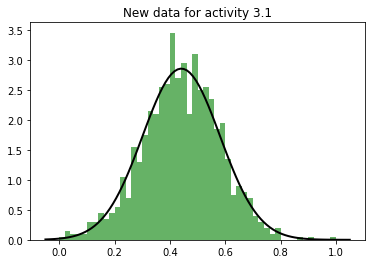

In [0]:
# For some math we need to do.
import numpy as np

def my_scale(data, new_min, new_max):
    """
    Scales data to within the range [new_min,new_max].

    Parameters
    ----------
    :param data: the data to scale.
    :param new_min: the new minimum value for the data range.
    :param new_max: the new maximum value for the data range.

    Returns
    ----------
    :return: A new array with the data scaled to within the range [new_min,new_max].
    """
    minimum = np.min(data)
    maximum = np.max(data)

    new_data = []

    for n in range(len(data)):

        value = data[n]
        x = (new_min * (1 - ( (value - minimum) /( maximum - minimum )))) +\
         (new_max * ( (value - minimum) /( maximum - minimum ) ))
        new_data.append(x)

    return new_data

########################### 
# End your code here.
########################### 

new_min = 0
new_max = 1

scaled_data =  my_scale(data,new_min,new_max)

########################### 
# Now plot the data to test
########################### 

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Fit a normal distribution to the data we created earlier.
mu, std = norm.fit(scaled_data)

# Plot the histogram. Details of this function can be found here:
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html
# Here the alpha parameter dictates how transparent the histogram will be,
# so alpha=1.0 is zero transparency, and alpha=0.0 is completely 
# transparent.
plt.hist(scaled_data, bins=50, density=True, alpha=0.6, color='g')

# Now we plot what we call the probability density function, or PDF.
xmin, xmax = plt.xlim() # Gets the max and min values in the data.

# Creates equally spaced numerical values between the mix and max values. This 
# call produces an array of values. These will be used to create x-axis co-
# ordinates, which we need to plot the normal curve. Remember to plot the curve,
# we need x and y-axis values.
x = np.linspace(xmin, xmax, 100) 

# This line creates the probability density function - this provides the y 
# values for the plot.
y = norm.pdf(x, mu, std)

# Now we plot the function over the top of the histogram.
plt.plot(x, y, 'k', linewidth=2)
title = ("New data for activity 3.1")
plt.title(title)

# Finally show the plot.
plt.show()

# And clear the data
scaled_data = None # I set this variable to none, to cleanup explicitly.

<br/>

You should see in the plot above, that the data has now been transformed.

<br/>

### Standardising/Normalising Data

<br/>

[Normalisation](https://en.wikipedia.org/wiki/Normalization_(statistics)) is an important process that we often use to pre-process our data. It allows us to adjust our data to a common scale, which makes the data easier to process for many machine learning algorithms. A simple way of normalising data involves altering it, so it has a [mean](https://en.wikipedia.org/wiki/Arithmetic_mean) (average) of zero, and unit [variance](https://en.wikipedia.org/wiki/Variance) (a variance exactly equal to 1). Remember, the mean is simply a statistic used to measure the average value of the data. Whilst variance is another metric we can use to measure how spread out the data is. So, data with a mean of 1 and a variance of 0.01, would be tightly clustered around the value of 1. Whilst data with a mean of 1 and a variance of 10 will be much more spread out. We can use code from numpy library to make this normalisation process easy. Later we can write our own methods to do this.

<br/>

For those that are interested, the type of normalisation we doing here is also known as the [standard score](https://en.wikipedia.org/wiki/Standard_score) and Z-score normalisation. It uses a simple formula to alter the data. This is as follows:

<br/>

$z = \frac{x-\mu}{\sigma}$

<br/>

This basically tells us that the standard score $z$, is equal to the value $x$ minus the mean of the data ($\mu$, called "mu"), divided by the standard deviation of the data ($\sigma$, called "sigma"). If we have the following data,

<br/>

$x=[1,2,3]$

<br/>

There are 3 items thus $N=3$. Then the mean of the data is equal to:

<br/>

$\mu = \frac{1+2+3}{N}=\frac{6}{3}=2$

<br/>

The standard deviation is given by:

<br/>

$\sigma = \sqrt{\frac{ \sum_{i=1}^{N} (x_{i} - \mu)^{2} }{N}}$

<br/>

We can substitute in values as follows:

<br/>

$\sigma = \sqrt{\frac{ (1 - 2)^{2} + (2 - 2)^{2} + (3 - 2)^{2} }{2}}$

$= \sqrt{\frac{ (-1)^{2} + (0)^{2} + (1)^{2} }{2}}$

$= \sqrt{\frac{ 1 + 0 + 1 }{2}}$

$= \sqrt{\frac{ 2 }{2}}$

$= 1$

<br/>

<br/>

Let’s show how we can do this using the numpy libraries. Let’s compute the normalised version of some simple data, where,

<br/>

 $x = [0,0,1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0,0]$.

<br/>

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['title', 'std', 'uniform', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


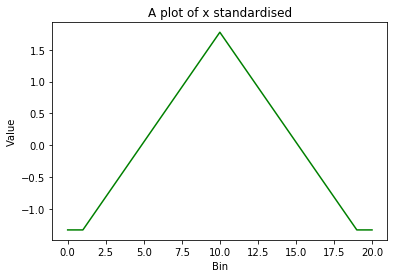

[-1.33019453 -1.33019453 -0.98532928 -0.64046403 -0.29559878  0.04926646
  0.39413171  0.73899696  1.08386221  1.42872745  1.7735927   1.42872745
  1.08386221  0.73899696  0.39413171  0.04926646 -0.29559878 -0.64046403
 -0.98532928 -1.33019453 -1.33019453]


In [0]:
%pylab inline 
import matplotlib.pyplot as plt
import numpy as np

# Create the data
x = [0,0,1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0,0]

# This step alters the data. For each element in data, it computes
# the value of that element minus the mean of the whole list, divided
# by the standard deviation of the whole of the list.
x = (x - np.mean(x)) / np.std(x)

# Here I plot the contents of the variable x.
plot(x, 'g') # The 'g' parameter tells matplotlib to plot in green.
xlabel('Bin')
ylabel('Value')
title("A plot of x standardised")
show()

# Show values now in data.
print(x)


<br/>

You can see the maximum value on the y-axis has changed, compared to the first plot we created. Has this process worked correctly, however? Lets check.

<br/>

In [0]:
print("The mean of data is: ", np.mean(x))
print("The standard deviation of data is: ", np.std(x))

The mean of data is:  -2.114710523095536e-17
The standard deviation of data is:  0.9999999999999999


<br/>

The results above suggest the mean of $data$ isn't quite zero - is this correct? Well, there are an odd number of data items and the mean is almost exactly zero. So this is indeed correct. If we convert the mean value to an integer, we can see this is the case.

<br/>

In [0]:
print("The mean of data is: ", int(np.mean(x)))

The mean of data is:  0


<br/>

We can see that it is indeed zero. What I did above was cast the data to the integer data type. You must be careful when writing mathematical functions, as if you get casts wrong, your answers will look very weird.

<br/>

Now, going back to how we standardised the data. Suppose we want to do that again, but for a new data set.

<br/>

In [0]:
y = [2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2]

<br/>

Well, we can convert the code I wrote before into a function. Here is a new function that standardises the data.

<br/>

In [0]:
import numpy as np

def standardise(x):
    """
    Standardise the data so that it has a zero mean, and a unit varience.

    Parameters
    ----------
    N/A

    Returns
    ----------
    N/A
    """
        
    x = (x - np.mean(x)) / np.std(x)
    return x

<br/>

Now lets try this new function out.

<br/>

In [0]:
import numpy as np

print("Mean of data before standardisation: ", np.mean(y))
print("Standard deviation of data before standardisation: ", np.std(y))

standardised_y = standardise(y)

print("\nMean of data after standardisation: ", np.mean(standardised_y))
print("Standard deviation of data after standardisation: ", np.std(standardised_y))

Mean of data before standardisation:  5.379310344827586
Standard deviation of data before standardisation:  2.1239811854392405

Mean of data after standardisation:  -4.594026308793751e-17
Standard deviation of data after standardisation:  0.9999999999999999


<br/>

### Activity 3.2

Why don't we try to write our own standardisation function. The aims here are as follows.

1. Write a function that normalises data, giving it a mean of 0 and a unit variance.
2. The function should accept a list as input, and output a new list.
3. Do not use numpy to solve this problem - implement your own function using the formulas for the mean and standard deviation.
4. Call the function ```myNormalisationFunction```.
5. Print out the mean (mu) and standard deviation (sigma) when computed in your function.
6. Assume we are using floating-point values at all times.

<br/>

**Relevant formulas:**

<br/>

$z = \frac{x-\mu}{\sigma}$

<br/>

$\mu = \frac{\textrm{Sum of inputs}}{\textrm{Number of inputs}}$

<br/>

$\sigma = \sqrt{\frac{ \sum_{i=1}^{N} (x_{i} - \mu)^{2} }{N}}$

<br/>

Note: you can use the in-built ```sqrt()``` function.

<br/>


In [0]:
# This is some test data - do not delete/alter it.
x = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,9.0,9.0,8.0,8.0,7.0,7.0,8.0,8.0,9.0,9.0]

#########################
# Write your code here.
#########################

def myNormalisationFunction(x):
    return []

#########################
# End of your code.
#########################

print("\n") # Create a new line for nicer output formatting.
print("Length of x:", len(x))
print("Content of x:")
print(x)
    
# This is some testing code - do not delete this. Read through it and try to understand it.
new_x = myNormalisationFunction(x)

print("\n") # Create a new line for nicer output formatting.
print("Length of new_x:", len(new_x))
print("Content of new_x:")
print(new_x)

print("\n") # Create a new line for nicer output formatting.
print("Mu value computed using standard library: ", mean(x))
print("Sigma value computed using standard library: ", std(x))
print("Do these values match those your function outputted?")

# Here I plot the contents of the variable new_x.
figure(4)
plot(new_x, 'y') # The 'y' parameter tells matplotlib to plot in yellow.
xlabel('Bin')
ylabel('Value')
title("A plot of new_x - hopefully standardised")
show()

<br/>

There is a solution below - only look if you get stuck!

<br/>

### Activity 3.2 Solution

<br/>



Length of x: 20
Content of x:
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 9.0, 9.0, 8.0, 8.0, 7.0, 7.0, 8.0, 8.0, 9.0, 9.0]
Computed mu: 6.85
Computed sigma: 2.495495942693556


Length of new_x: 20
Content of new_x:
[-2.3442234066250185, -1.9435014567745879, -1.5427795069241572, -1.1420575570737268, -0.7413356072232963, -0.3406136573728658, 0.06010829247756472, 0.46083024232799524, 0.8615521921784257, 1.2622741420288563, 0.8615521921784257, 0.8615521921784257, 0.46083024232799524, 0.46083024232799524, 0.06010829247756472, 0.06010829247756472, 0.46083024232799524, 0.46083024232799524, 0.8615521921784257, 0.8615521921784257]


Mu value computed using standard library:  6.85
Sigma value computed using standard library:  2.495495942693556
Do these values match those your function outputted?


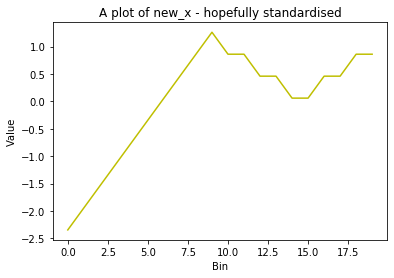

In [0]:
# This is some test data - do not delete/alter it.
x = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,9.0,9.0,8.0,8.0,7.0,7.0,8.0,8.0,9.0,9.0]

#########################
# Write your code here.
#########################

def myNormalisationFunction(x):
    """
    Standardise the data so that it has a zero mean, and a unit variance.

    Parameters
    ----------
    N/A

    Returns
    ----------
    N/A
    """
    
    # If the input is not initialised, or empty, then just return
    # an empty array. This is some basic error checking.
    if x is None or len(x) == 0:
        return []
    
    
    # There are many ways to solve this problem - I'm choosing a simple one
    # that facilities an understanding - you can optimise this code. I'll
    # Let you try that in your own time.
    #
    # Let's start with the mean.
    total = 0.0
    items = float(len(x))
    for i in range(0,len(x)):
        total += x[i]
        
    mu = total / items
    
    total = 0.0
    # Now for the standard deviation
    for i in range(0,len(x)):
        total += ( (x[i] - mu) * (x[i] - mu) ) # This is the value squared.
        
    sigma = sqrt(total / items)
    
    print("Computed mu:", mu)
    print("Computed sigma:", sigma)
    
    # Now we have these values, we can alter the data.
    new_x = []
    
    for i in range(0,len(x)):
        z = ( x[i] - mu ) / sigma
        new_x.append(z)
        
    return new_x
    
    
    

#########################
# End of your code.
#########################

print("\n") # Create a new line for nicer output formatting.
print("Length of x:", len(x))
print("Content of x:")
print(x)
    
# This is some testing code - do not delete this. Read through it and try to understand it.
new_x = myNormalisationFunction(x)

print("\n") # Create a new line for nicer output formatting.
print("Length of new_x:", len(new_x))
print("Content of new_x:")
print(new_x)

print("\n") # Create a new line for nicer output formatting.
print("Mu value computed using standard library: ", mean(x))
print("Sigma value computed using standard library: ", std(x))
print("Do these values match those your function outputted?")

# Here I plot the contents of the variable new_x.
figure(4)
plot(new_x, 'y') # The 'y' parameter tells matplotlib to plot in yellow.
xlabel('Bin')
ylabel('Value')
title("A plot of new_x - hopefully standardised")
show()

<br/>

### Back to Summary Statistics

<br/>

Now that we've scaled our data, how about we compute some summary statistics over it. There are 4 main statistics that we'll consider.

<br/>

| Statistic | Description | Definition|
|---------|-------------|-----------|
| $\mu$ | Mean of the data. | $\displaystyle \frac{1}{n}\sum_{\rm i=1}^{\rm n} x_{\rm i}$ |
| $\sigma$ | Sample standard deviation of the data. | $\displaystyle \sqrt{\frac{\sum_{\rm i=1}^{\rm n}(\rm x_{\rm i}-\bar{x})^{\rm 2}}{n-1}}$ |
| $k$ | Excess kurtosis of the data. | $\displaystyle \frac{\frac{1}{n}(\sum_{\rm i=1}^{n}(x_{\rm i}-\bar{x})^{\rm 4})}{(\frac{1}{n}(\sum_{\rm i=1}^{\rm n}(x_{\rm i}-\bar{x})^{\rm 2}))^{\rm 2}}-3$ |
| $s$ | Skewness of the data. | $\displaystyle \frac{\frac{1}{n}\sum_{\rm i=1}^{\rm n}(x_{\rm i}-\bar{x})^{\rm 3}}{\big(\sqrt{\frac{1}{n}\sum_{\rm i=1}^{\rm n}(x_{\rm i}-\bar{x})^{\rm 2}}\big)^3}$ |

<br/>

The following diagram may help explain what these metrics are describing. 

<br/>

<img src="https://github.com/scienceguyrob/AI4AstroMasterclass/raw/master/media/images/ml/24_skew_and_kurtosis.png" width="500">

<br/>

The code provided below shows how to extract these features from our scaled data

<br/>

In [0]:
from scipy.stats import skew
from scipy.stats import kurtosis
import numpy as np

# First we create some data
np.random.seed(1) # Initiate a random number generator.

mu    = 5.0 # The mean of the data.
sigma = 2.0 # The standard deviation of the data.
n     = 1000 # The number of random samples to take.

# Create the data
data = np.random.normal(size = n, loc = mu, scale = sigma)

print("Data samples created: ", len(data))

# Perform computations
mu = np.mean(data)
sigma = np.std(data, ddof=1)
k = kurtosis(data,fisher=True)
s = skew(data)

print("Scaled data mean: ",mu)
print("Scaled data sigma: ",sigma)
print("Scaled data kurtosis: ",k)
print("Scaled data skew: ",s)

Data samples created:  1000
Scaled data mean:  5.077624952319204
Scaled data sigma:  1.9629900083651206
Scaled data kurtosis:  0.23360137518812651
Scaled data skew:  -0.06835228125486865


<br/>

You’ve now learned how to compute 4 summary statistics over a data distribution. You can now use these to compare distributions, determining which are more skewed, or which have higher means, etc.

<br/>






<br/>

That's it for Section 3.


<br/>

---


## 4. Hypothesis Testing

<br/>

In the lecture notes, I describe the five main steps to be undertaken when testing hypotheses. These are listed again below for completeness.

<br/>

1. We form hypotheses to answer questions about our data.
2. We collect data samples to test them.
3. We compute summary statistics over the data sample, such as the sample mean and sample standard deviation.
4. We compute the $Z$-score and use this along with normal probability tables to determine the area under the curve.
5. We use these areas to represent probabilities as p-values, and evaluate them with respect to some significance level, alpha($\alpha$). 

<br/>

Consider an example problem. Suppose we are data scientists working for a tech company. We are asked to determine the following:

<br/>


“Has customer interaction time with our new sales website, increased after an interface redesign?”

<br/>

We form two hypotheses to help answer this problem. The null hypothesis, $H_{0}$ is that there has been no change. Whilst the alternative hypothesis $H_{1}$ is that there has been some positive change.

<br/>

Before we go another further, we collect some data. We have two samples of data:

<br/>

1.	User interaction time in minutes, before the redesign.
2.	User interaction time in minutes, after the redesign.

<br/>

Before we go any further, we load our sample data.

<br/>


In [0]:
import numpy as np

# We load some data from an external resurce.
before_url = 'https://raw.githubusercontent.com/scienceguyrob/ioc-techup/master/notebooks/data/wesbite_study/before.csv'
after_url = 'https://raw.githubusercontent.com/scienceguyrob/ioc-techup/master/notebooks/data/wesbite_study/after.csv'

# Now simply load the data.
before = np.loadtxt(before_url, dtype=np.float, delimiter=',', encoding='utf-8')
after = np.loadtxt(after_url, dtype=np.float, delimiter=',', encoding='utf-8')

# Print overview details of the data we've obtained.
print ('Total number of before data points: ', len(before))
print ('Total number of after data points: ', len(after))

print("Data type of before: ", type(before))
print("Data type of before: ", type(after))

print("First element in before: ",before[0])
print("First element in after: ", after[0])

Total number of before data points:  1000
Total number of after data points:  1000
Data type of before:  <class 'numpy.ndarray'>
Data type of before:  <class 'numpy.ndarray'>
First element in before:  32.36518045494863
First element in after:  38.23821654593835


<br/>

Now we have the data, we take a few first steps.

<br/>


1.	We visualise the data.
2.	We compute summary statistics.

<br/>



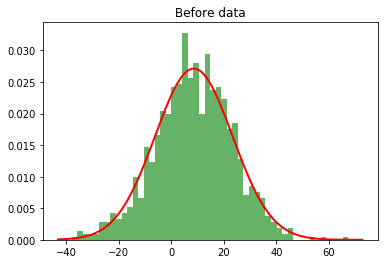

In [0]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

########################### 
# Before data first
###########################

# Fit a normal distribution to the before data first
mu, std = norm.fit(before)
plt.hist(before, bins=50, density=True, alpha=0.6, color='g')
# Now we plot what we call the probability density function, or PDF.
xmin, xmax = plt.xlim() # Gets the max and min values in the data.
# Creates equally spaced numerical values between the mix and max values.
x = np.linspace(xmin, xmax, 200) 
# This line creates the probability density function - this provides the y 
# values for the plot.
y = norm.pdf(x, mu, std)
# Now we plot the function over the top of the histogram.
plt.plot(x, y, 'r', linewidth=2)

########################### 
# Show plot and edit title
###########################

title = ("Before data")
plt.title(title)

# Finally show the plot.
plt.show()

<br/>

Now for the after data...

<br/>

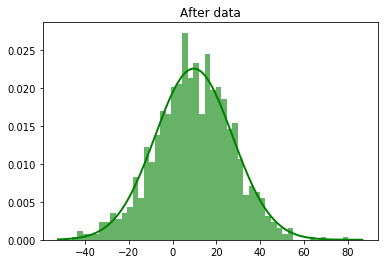

In [0]:
########################### 
# Now the after data
###########################

# Fit a normal distribution to the before data first
mu, std = norm.fit(after)
plt.hist(after, bins=50, density=True, alpha=0.6, color='g')
# Now we plot what we call the probability density function, or PDF.
xmin, xmax = plt.xlim() # Gets the max and min values in the data.
# Creates equally spaced numerical values between the mix and max values.
x = np.linspace(xmin, xmax, 200) 
# This line creates the probability density function - this provides the y 
# values for the plot.
y = norm.pdf(x, mu, std)
# Now we plot the function over the top of the histogram.
plt.plot(x, y, 'g', linewidth=2)

########################### 
# Show plot and edit title
###########################

title = ("After data")
plt.title(title)

# Finally show the plot.
plt.show()

<br/>

Next we compute some summary statistics.
<br/>

<r/>

### Activity 4.1

<br/>

Please compute the summary statistics for the before and after data. We compute,

<br/>

* the mean.
* the standard deviation.

<br/>

In [0]:
# Your code here

<br/>

An answer is provided below.

<br/>


### Activity 4.1 Solution

In [0]:
import numpy as np

# Perform computations
mu = np.mean(before)
sigma = np.std(before, ddof=1)

print("Before data mean: ",mu)
print("Before data sigma: ",sigma)

# Perform computations
mu = np.mean(after)
sigma = np.std(after, ddof=1)

print("\nAfter data mean: ",mu)
print("After data sigma: ",sigma)


Before data mean:  8.582187142394028
Before data sigma:  14.722425062738402

After data mean:  9.698624570872832
After data sigma:  17.666910075286086


<br/>

Now we reform our hypotheses based on the summary statistics. We now have $H_{0}: \mu = 8.58$, and $H_{1}: \mu > 8.58$ - so how can we test these hypotheses? Remember the steps I outlined earlier:

<br/>

1. We form hypotheses to answer questions about our data - DONE.
2. We collect data samples to test them - DONE.
3. We compute summary statistics over the data sample, such as the sample mean and sample standard deviation - DONE.
4. We compute the $Z$-score and use this along with normal probability tables to determine the area under the curve.
5. We use these areas to represent probabilities as p-values, and evaluate them with respect to some significance level, alpha($\alpha$). 

<br/>

The next step involves computing the $Z$-score. The formula for the $Z$-score is as follows:

<br/>

$z=\frac{x-\mu}{\sigma}$, where,

<br/>

$\sigma$ here is given by the standard error,

<br/>

$S_{\bar{x}}=\frac{stdev.}{\sqrt{n}}$,

<br/>

Where $n$ is the number of observations.

<br/>

We can compute the $Z$-score for our data as follows.

<br/>




In [0]:
import numpy as np

# Perform mean and sigma computations again for clarity
mu_before = np.mean(before)
sigma_before = np.std(before, ddof=1)
print("Mean of data before interface update: ", mu_before, " minutes.")
print("Stdev. of data before interface update: ", sigma_before, " minutes.\n")

mu_after = np.mean(after)
sigma_after = np.std(after, ddof=1)
print("Mean of data after interface update: ", mu_after, " minutes.")
print("Stdev. of data after interface update: ", sigma_after, " minutes.\n")

# Samples in the data collected after the change.
n = len(after)

# Standard error in the sample data collected after the interface change.
standard_error = sigma_after / np.sqrt(n)
print("Standard error of the sample data: ", standard_error , ".")

# Now we compute the z-score.
z = (mu_after - mu_before) / standard_error  
print("Z-score for the data: ", z , ".")  

Mean of data before interface update:  8.582187142394028  minutes.
Stdev. of data before interface update:  14.722425062738402  minutes.

Mean of data after interface update:  9.698624570872832  minutes.
Stdev. of data after interface update:  17.666910075286086  minutes.

Standard error of the sample data:  0.5586767505528085 .
Z-score for the data:  1.998360281458094 .


<br/>

We now have the $Z$-score. This means we can compute the probability of a mean value below 9.699 occurring.

<br/>

In [0]:
# We use the scipy library to convert the z score into a probability.
import scipy.stats as st
pvalue = st.norm.cdf(z)

print("Probability of a mean below ", mu_after, " is: ", pvalue)
print("or ", pvalue * 100, " %")



Probability of a mean below  9.698624570872832  is:  0.9771611927796227
or  97.71611927796226  %


<br/>

We not set a significance level. We want to be 95% confident that there has been an improvement. Thus we set $\alpha=0.05$. Then we check if our p-value is less than the confience interval.

<br/>




In [0]:
alpha = 0.05

if pvalue < alpha:
  print("P-value less then alpha! We reject the null hypothesis.")
  print("We accept the alternative hypothesis that interaction time increased.")
else:
  print("P-value greater than, or equal to alpha! We accept the null hypothesis.")
  print("We reject the alternative hypothesis that interaction time increased.")

P-value great than, or equal to alpha! We accept the null hypothesis.
We reject the alternative hypothesis that interaction time increased.


<br/>

It's now upto you to read over what we've done and try to understand it.

<br/>


<r/>

### Activity 4.2

<br/>

You're a data scientist asked to analyse traffic data, collected before and after a relief road has been constructed. You are asked to determine if the road has decreased wait times (in minutes) at a busy junction near the relief road. In the cell below, I'd like you to analyse this data by yourself, with little guidance from me. I'll just show you how to load the data, then it's up to you to employ the tools and strategies we've learned about above and in the lecture notes.

<br/>

An answer is provided below if you get stuck!

<br/>


In [0]:
import numpy as np

# We load some data from an external resurce.
before_url = 'https://raw.githubusercontent.com/scienceguyrob/ioc-techup/master/notebooks/data/commute/before.csv'
after_url = 'https://raw.githubusercontent.com/scienceguyrob/ioc-techup/master/notebooks/data/commute/after.csv'

# Now simply load the data.
before = np.loadtxt(before_url, dtype=np.float, delimiter=',', encoding='utf-8')
after = np.loadtxt(after_url, dtype=np.float, delimiter=',', encoding='utf-8')

# Print overview details of the data we've obtained.
print ('Total number of before data points: ', len(before))
print ('Total number of after data points: ', len(after))

print("Data type of before: ", type(before))
print("Data type of before: ", type(after))

print("First element in before: ",before[0])
print("First element in after: ", after[0])

# Your code here





Total number of before data points:  100
Total number of after data points:  100
Data type of before:  <class 'numpy.ndarray'>
Data type of before:  <class 'numpy.ndarray'>
First element in before:  13.873036090989725
First element in after:  11.248690727326483


<br/>

An answer is provided below.

<br/>


### Activity 4.2 Solution

In [0]:
import numpy as np
import scipy.stats as st

# We load some data from an external resurce.
before_url = 'https://raw.githubusercontent.com/scienceguyrob/ioc-techup/master/notebooks/data/commute/before.csv'
after_url = 'https://raw.githubusercontent.com/scienceguyrob/ioc-techup/master/notebooks/data/commute/after.csv'

# Now simply load the data.
before = np.loadtxt(before_url, dtype=np.float, delimiter=',', encoding='utf-8')
after = np.loadtxt(after_url, dtype=np.float, delimiter=',', encoding='utf-8')

# Print overview details of the data we've obtained.
print ('Total number of before data points: ', len(before))
print ('Total number of after data points: ', len(after))

print("Data type of before: ", type(before))
print("Data type of before: ", type(after))

print("First element in before: ",before[0])
print("First element in after: ", after[0], "\n")

# Perform mean and sigma computations again for clarity
mu_before = np.mean(before)
sigma_before = np.std(before, ddof=1)
print("Mean of data before interface update: ", mu_before, " minutes.")
print("Stdev. of data before interface update: ", sigma_before, " minutes.\n")

mu_after = np.mean(after)
sigma_after = np.std(after, ddof=1)
print("Mean of data after interface update: ", mu_after, " minutes.")
print("Stdev. of data after interface update: ", sigma_after, " minutes.\n")

# Samples in the data collected after the change.
n = len(after)

# Standard error in the sample data collected after the interface change.
standard_error = sigma_after / np.sqrt(n)
print("Standard error of the sample data: ", standard_error , ".")

# Now we compute the z-score.
z = (mu_after - mu_before) / standard_error  
print("Z-score for the data: ", z , ".")  

# We use the scipy library to convert the z score into a probability.
pvalue = st.norm.cdf(z)

print("Probability of a mean below ", mu_after, " is: ", pvalue)
print("or ", pvalue * 100, " %\n")

print("Probability of a mean above ", mu_after, " is: ", 1 - pvalue)
print("or ", (1-pvalue) * 100, " %\n")

tail_probability =  1 - pvalue
probability_of_value_as_extreme_as_mu_after = 2 * tail_probability

print("Probability of a mean at least as extreme as we saw in the sample ")
print(" is given by", probability_of_value_as_extreme_as_mu_after, "which is")
print("approx: ", 100 * probability_of_value_as_extreme_as_mu_after, " %.\n\n")


alpha = 0.05

if probability_of_value_as_extreme_as_mu_after < alpha:
  print("P-value less then alpha! We reject the null hypothesis.")
  print("We accept the alternative hypothesis that interaction time increased.")
else:
  print("P-value greater than, or equal to alpha! We accept the null hypothesis.")
  print("We reject the alternative hypothesis that wait time increased or decreased.")




Total number of before data points:  100
Total number of after data points:  75
Data type of before:  <class 'numpy.ndarray'>
Data type of before:  <class 'numpy.ndarray'>
First element in before:  13.63547062735605
First element in after:  13.673036090989726 

Mean of data before interface update:  8.787806841434668  minutes.
Stdev. of data before interface update:  2.757807948668478  minutes.

Mean of data after interface update:  8.978756010902876  minutes.
Stdev. of data after interface update:  2.8656821803661856  minutes.

Standard error of the sample data:  0.33090047564926617 .
Z-score for the data:  0.5770592172572225 .
Probability of a mean below  8.978756010902876  is:  0.7180502734512975
or  71.80502734512974  %

Probability of a mean above  8.978756010902876  is:  0.28194972654870254
or  28.194972654870256  %

Probability of a mean at least as extreme as we saw in the sample 
 is given by 0.5638994530974051 which is
approx:  56.38994530974051  %.


P-value greater than, or


<br/>

That's it for Section 4.


<br/>

---